In [1]:
#draw transformation of Gaussian PDF from LAB to COM
############################################################################

import numpy as np
from math import pi
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

plt.style.use('vyason')
from collections import OrderedDict
ls_dict = OrderedDict(
            [('solid',     (0, ())),
            ('ldot',      (0, (1, 10))),
            ('dot',       (0, (1, 5))),
            ('ddot',      (0, (1, 1))),
            ('ldash',     (0, (5, 10))),
            ('dash',      (0, (5, 5))),
            ('ddash',     (0, (5, 1))),
            ('ldashdot',  (0, (3, 10, 1, 10))),
            ('dashdot',   (0, (3, 5, 1, 5))),
            ('ddashdot',  (0, (3, 1, 1, 1))),
            ('ldashdot',  (0, (3, 10, 1, 10, 1, 10))),
            ('dashdot',   (0, (3, 5, 1, 5, 1, 5))),
            ('ddashdot',  (0, (3, 1, 1, 1, 1, 1)))])

script,tiny,small,normal,large,huge=5,6,7,8,9,10

def_width,def_height = plt.rcParams["figure.figsize"]
def_height = 0.5*def_width

def gauss(x,sig):
    return np.exp(-(x/(2*sig))**2)/np.sqrt(sig*np.sqrt(2*pi))

SPECIAL CASE OF IDENTICAL MASSES

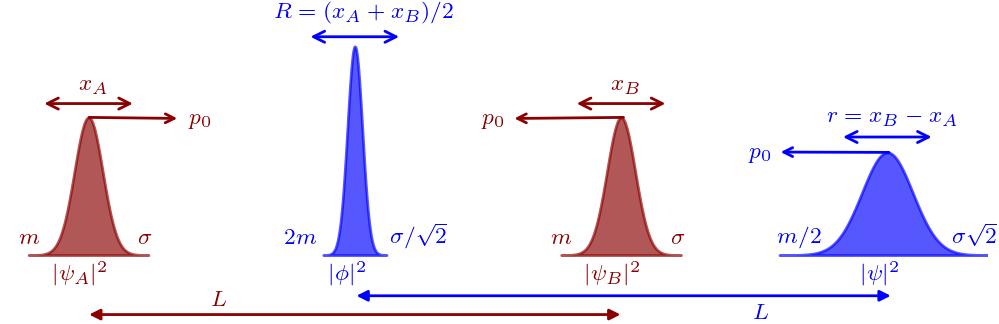

In [2]:
fig = plt.figure(constrained_layout=True,dpi=200)
fig.set_size_inches(1.5*def_width,def_height)
ax = fig.add_gridspec(1,1).subplots()
ax.axis('off')
    
xmin,xmax,dx=-10,+19,0.02
x=np.arange(xmin,xmax+dx,dx)

xA0,xB0,sig = -8,+8,0.3

R0,r0 = (xA0+xB0)/2,xB0 -xA0
sigA,sigB = sig,sig
sigR,sigr = sig/1.9,sig*1.8

xA,xB = np.arange(xA0-6*sigA,xA0+6*sigA+dx,dx),np.arange(xB0-6*sigB,xB0+6*sigB+dx,dx)
R,r = np.arange(R0-6*sigR,R0+6*sigR+dx,dx),np.arange(r0-6*sigr,r0+6*sigr+dx,dx)

rhoA,rhoB = gauss(xA-xA0,sigA),gauss(xB-xB0,sigB)
rhoR,rhor = 1.1*gauss(R-R0,sigR),gauss(r-r0,sigr)

c_LAB = 'darkred'
c_COM = 'blue'
alpha = 0.5

ymin,ymax=-0.33*gauss(0,sigR),1.3*gauss(0,sigR)

ax.set_xlim(xmin-2*sig,xmax)
ax.set_ylim(ymin,ymax)

ax.plot(xA,rhoA,color=c_LAB,ls='');                ax.plot(xB,rhoB,color=c_LAB,ls='')
ax.fill_between(xA,rhoA,color=c_LAB,alpha=alpha);  ax.fill_between(xB,rhoB,color=c_LAB,alpha=alpha)

ax.plot(R,rhoR,color=c_COM,ls='');                 ax.plot(r,rhor,color=c_COM,ls='')
ax.fill_between(R,rhoR,color=c_COM,alpha=alpha);   ax.fill_between(r,rhor,color=c_COM,alpha=alpha)


#write masses and sigmasa and wave functions
#----------------------------------------------------------------------------------
ax.annotate(r'$m$',(xA0-7*sig,0.05*ymax),color=c_LAB,fontsize=normal)
ax.annotate(r'$m$',(xB0-7*sig,0.05*ymax),color=c_LAB,fontsize=normal)
ax.annotate(r'$2m$',(R0-7*sig,0.05*ymax),color=c_COM,fontsize=normal)
ax.annotate(r'$m/2$',(r0-11*sig,0.05*ymax),color=c_COM,fontsize=normal)

ax.annotate(r'$\sigma$',(xA0+5*sig,0.05*ymax),color=c_LAB,fontsize=normal)
ax.annotate(r'$\sigma$',(xB0+5*sig,0.05*ymax),color=c_LAB,fontsize=normal)
ax.annotate(r'$\sigma/\sqrt{2}$',(R0+3.5*sig,0.05*ymax),color=c_COM,fontsize=normal)
ax.annotate(r'$\sigma\sqrt{2}$',(r0+6.5*sig,0.05*ymax),color=c_COM,fontsize=normal)

ax.annotate(r'$|\psi_A|^2$',(xA0-3.5*sig,0.4*ymin),color=c_LAB,fontsize=normal)
ax.annotate(r'$|\psi_B|^2$',(xB0-3.5*sig,0.4*ymin),color=c_LAB,fontsize=normal)
ax.annotate(r'$|\phi|^2$',(R0-2.5*sig,0.4*ymin),color=c_COM,fontsize=normal)
ax.annotate(r'$|\psi|^2$',(r0-2.5*sig,0.4*ymin),color=c_COM,fontsize=normal)


#write displacements xA xB R r and show arrows
#----------------------------------------------------------------------------------
ax.annotate(r'$x_A$',(xA0-1*sig,1.2*gauss(0,sigA)),color=c_LAB,fontsize=normal)
ax.annotate(r'$x_B$',(xB0-1*sig,1.2*gauss(0,sigB)),color=c_LAB,fontsize=normal)
ax.annotate(r'$R = (x_A+x_B)/2$',(R0-8*sig,1.25*gauss(0,sigR)),color=c_COM,fontsize=normal)
ax.annotate(r'$r = x_B-x_A$',(r0-6*sig,1.3*gauss(0,sigr)),color=c_COM,fontsize=normal)

ax.annotate('',xytext=(xA0-5*sig,1.1*gauss(0,sigA)),xy=(xA0+5*sig,1.1*gauss(0,sigA)),arrowprops=dict(arrowstyle='<->',color=c_LAB))
ax.annotate('',xytext=(xB0-5*sig,1.1*gauss(0,sigB)),xy=(xB0+5*sig,1.1*gauss(0,sigB)),arrowprops=dict(arrowstyle='<->',color=c_LAB))
ax.annotate('',xytext=(R0-5*sig,1.15*gauss(0,sigR)),xy=(R0+5*sig,1.15*gauss(0,sigR)),arrowprops=dict(arrowstyle='<->',color=c_COM))
ax.annotate('',xytext=(r0-5*sig,1.15*gauss(0,sigr)),xy=(r0+5*sig,1.15*gauss(0,sigr)),arrowprops=dict(arrowstyle='<->',color=c_COM))


#show distance L between wave packets
#----------------------------------------------------------------------------------
ax.annotate('',xytext=(xA0-0.5*sigA,0.95*ymin),xy=(xB0+0.5*sigB,0.95*ymin),arrowprops=dict(arrowstyle='<|-|>',color=c_LAB),fontsize=normal)
ax.annotate('',xytext=(R0-0.75*sigR,0.65*ymin),xy=(r0+0.5*sigr,0.65*ymin),arrowprops=dict(arrowstyle='<|-|>',color=c_COM),fontsize=normal)
ax.annotate(r'$L$',((xA0+R0)/2-sig,0.8*ymin),color=c_LAB,fontsize=normal)
ax.annotate(r'$L$',((xB0+r0)/2,1.0*ymin),color=c_COM,fontsize=normal)


#show momentum arrows p0
#----------------------------------------------------------------------------------
ax.annotate(r'$p_0$',color=c_LAB,xytext=(xA0+10*sig,0.95*gauss(0,sigA)),xy=(xA0-0.5*sig,1*gauss(0,sigA)),arrowprops=dict(arrowstyle='<-',color=c_LAB),fontsize=normal)
ax.annotate(r'$p_0$',color=c_LAB,xytext=(xB0-14*sig,0.95*gauss(0,sigB)),xy=(xB0+0.8*sig,1*gauss(0,sigB)),arrowprops=dict(arrowstyle='<-',color=c_LAB),fontsize=normal)
ax.annotate(r'$p_0$',color=c_COM,xytext=(r0-14*sig,0.95*gauss(0,sigr)),xy=(r0+0.4*sigr,1*gauss(0,sigr)),arrowprops=dict(arrowstyle='<-',color=c_COM),fontsize=normal)

fig.savefig('TMGS_special-THESIS.pdf')

In [3]:
fig = plt.figure(constrained_layout=True,dpi=200)
fig.set_size_inches(1.5*def_width,def_height)
ax = fig.add_gridspec(1,1).subplots()
ax.axis('off')
    
xmin,xmax,dx=-11,+19,0.02
x=np.arange(xmin,xmax+dx,dx)

xA0,xB0,sig = -8,+8,0.3

R0,r0 = (xA0+xB0)/2,xB0 -xA0
sigA,sigB = sig,sig
sigR,sigr = sig/1.9,sig*1.8

xA,xB = np.arange(xA0-6*sigA,xA0+6*sigA+dx,dx),np.arange(xB0-6*sigB,xB0+6*sigB+dx,dx)
R,r = np.arange(R0-6*sigR,R0+6*sigR+dx,dx),np.arange(r0-6*sigr,r0+6*sigr+dx,dx)

rhoA,rhoB = gauss(xA-xA0,sigA),gauss(xB-xB0,sigB)
rhoR,rhor = 1.1*gauss(R-R0,sigR),gauss(r-r0,sigr)

c_LAB = 'darkred'
c_COM = 'blue'
alpha = 0.66

ymin,ymax=-0.33*gauss(0,sigR),1.3*gauss(0,sigR)

ax.set_xlim(xmin-2*sig,xmax)
ax.set_ylim(ymin,ymax)

ax.plot(xA,rhoA,color=c_LAB,ls='');                ax.plot(xB,rhoB,color=c_LAB,ls='')
ax.fill_between(xA,rhoA,color=c_LAB,alpha=alpha);  ax.fill_between(xB,rhoB,color=c_LAB,alpha=alpha)

ax.plot(R,rhoR,color=c_COM,ls='');                 ax.plot(r,rhor,color=c_COM,ls='')
ax.fill_between(R,rhoR,color=c_COM,alpha=alpha);   ax.fill_between(r,rhor,color=c_COM,alpha=alpha)


#write masses and sigmasa and wave functions
#----------------------------------------------------------------------------------
ax.annotate(r'$m_A$',(xA0-9*sig,0.05*ymax),color=c_LAB,fontsize=normal)
ax.annotate(r'$m_B$',(xB0-9*sig,0.05*ymax),color=c_LAB,fontsize=normal)
ax.annotate(r'$M$',(R0-6*sig,0.05*ymax),color=c_COM,fontsize=normal)
ax.annotate(r'$\mu$',(r0-8*sig,0.05*ymax),color=c_COM,fontsize=normal)

ax.annotate(r'$\sigma_A$',(xA0+5*sig,0.05*ymax),color=c_LAB,fontsize=normal)
ax.annotate(r'$\sigma_B$',(xB0+5*sig,0.05*ymax),color=c_LAB,fontsize=normal)
ax.annotate(r'$\sigma_M$',(R0+3.5*sig,0.05*ymax),color=c_COM,fontsize=normal)
ax.annotate(r'$\sigma_\mu$',(r0+6.5*sig,0.05*ymax),color=c_COM,fontsize=normal)

ax.annotate(r'$|\psi_A|^2$',(xA0-3.5*sig,0.4*ymin),color=c_LAB,fontsize=normal)
ax.annotate(r'$|\psi_B|^2$',(xB0-3.5*sig,0.4*ymin),color=c_LAB,fontsize=normal)
ax.annotate(r'$|\phi|^2$',(R0-2.5*sig,0.4*ymin),color=c_COM,fontsize=normal)
ax.annotate(r'$|\psi|^2$',(r0-2.5*sig,0.4*ymin),color=c_COM,fontsize=normal)


#write displacements xA xB R r and show arrows
#----------------------------------------------------------------------------------
ax.annotate(r'$x_A$',(xA0-1*sig,1.2*gauss(0,sigA)),color=c_LAB,fontsize=normal)
ax.annotate(r'$x_B$',(xB0-1*sig,1.2*gauss(0,sigB)),color=c_LAB,fontsize=normal)
ax.annotate(r'$R = (m_Ax_A+m_Bx_B)/M$',(R0-13*sig,1.3*gauss(0,sigR)),color=c_COM,fontsize=normal)
ax.annotate(r'$r = x_B-x_A$',(r0-6*sig,1.3*gauss(0,sigr)),color=c_COM,fontsize=normal)

ax.annotate('',xytext=(xA0-5*sig,1.1*gauss(0,sigA)),xy=(xA0+5*sig,1.1*gauss(0,sigA)),arrowprops=dict(arrowstyle='<->',color=c_LAB))
ax.annotate('',xytext=(xB0-5*sig,1.1*gauss(0,sigB)),xy=(xB0+5*sig,1.1*gauss(0,sigB)),arrowprops=dict(arrowstyle='<->',color=c_LAB))
ax.annotate('',xytext=(R0-5*sig,1.15*gauss(0,sigR)),xy=(R0+5*sig,1.15*gauss(0,sigR)),arrowprops=dict(arrowstyle='<->',color=c_COM))
ax.annotate('',xytext=(r0-5*sig,1.15*gauss(0,sigr)),xy=(r0+5*sig,1.15*gauss(0,sigr)),arrowprops=dict(arrowstyle='<->',color=c_COM))


#show distance L between wave packets
#----------------------------------------------------------------------------------
ax.annotate('',xytext=(xA0-0.5*sigA,0.95*ymin),xy=(xB0+0.5*sigB,0.95*ymin),arrowprops=dict(arrowstyle='<|-|>',color=c_LAB),fontsize=normal)
ax.annotate('',xytext=(R0-0.75*sigR,0.65*ymin),xy=(r0+0.5*sigr,0.65*ymin),arrowprops=dict(arrowstyle='<|-|>',color=c_COM),fontsize=normal)
ax.annotate(r'$L$',((xA0+R0)/2-sig,0.8*ymin),color=c_LAB,fontsize=normal)
ax.annotate(r'$L$',((xB0+r0)/2,1.0*ymin),color=c_COM,fontsize=normal)


#write conditions
#----------------------------------------------------------------------------------
ax.annotate(r'$ m_A\sigma_A^2 = m_B\sigma_B^2 = \hbar/2\omega_0$',(xmax-11,ymax),fontsize=small)
ax.annotate(r'$\sigma_M = \sqrt{\hbar/2M\omega_0}, \ \sigma_\mu = \sqrt{\hbar/2\mu\omega_0}$',(xmax-12,ymax-0.3),fontsize=small)


fig.savefig('TMGS_general-THESIS.pdf')